In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import io
import requests

In [10]:
url='https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/HistData/Wheat.csv'
s=requests.get(url).content
df=pd.read_csv(io.StringIO(s.decode('utf-8')))

In [32]:
df.head()

Unnamed: 0  Year  Wheat  Wages
0           1  1565   41.0   5.00
1           2  1570   45.0   5.05
2           3  1575   42.0   5.08
3           4  1580   49.0   5.12
4           5  1585   41.5   5.15

In [13]:
df.describe()

Unnamed: 0         Year      Wheat      Wages
count   53.000000    53.000000  53.000000  50.000000
mean    27.000000  1694.924528  43.264151  11.581600
std     15.443445    77.089571  15.410287   7.336287
min      1.000000  1565.000000  26.000000   5.000000
25%     14.000000  1630.000000  33.000000   6.145000
50%     27.000000  1695.000000  41.000000   7.800000
75%     40.000000  1760.000000  47.000000  14.875000
max     53.000000  1821.000000  99.000000  30.000000

In [20]:
df.isnull() #check nan, wages at last 3 years are Nan
#df['Year']

Unnamed: 0   Year  Wheat  Wages
0        False  False  False  False
1        False  False  False  False
2        False  False  False  False
3        False  False  False  False
4        False  False  False  False
5        False  False  False  False
6        False  False  False  False
7        False  False  False  False
8        False  False  False  False
9        False  False  False  False
10       False  False  False  False
11       False  False  False  False
12       False  False  False  False
13       False  False  False  False
14       False  False  False  False
15       False  False  False  False
16       False  False  False  False
17       False  False  False  False
18       False  False  False  False
19       False  False  False  False
20       False  False  False  False
21       False  False  False  False
22       False  False  False  False
23       False  False  False  False
24       False  False  False  False
25       False  False  False  False
26       False  False  False  False
27       False  False  False  False
28       False  False  False  False
29       False  False  False  False
30       False  False  False  False
31       False  False  False  False
32       False  False  False  False
33       False  False  False  False
34       False  False  False  False
35       False  False  False  False
36       False  False  False  False
37       False  False  False  False
38       False  False  False  False
39       False  False  False  False
40       False  False  False  False
41       False  False  False  False
42       False  False  False  False
43       False  False  False  False
44       False  False  False  False
45       False  False  False  False
46       False  False  False  False
47       False  False  False  False
48       False  False  False  False
49       False  False  False  False
50       False  False  False   True
51       False  False  False   True
52       False  False  False   True

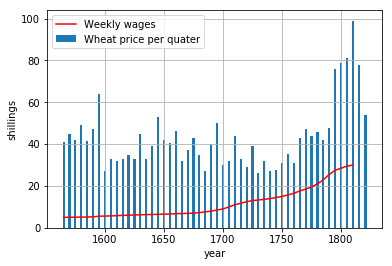

In [31]:
#reproduce the Playfair's graph.
plt.bar(df['Year'],df['Wheat'],width=1.8,label='Wheat price per quater')
plt.plot(df['Year'],df['Wages'],c='red',label='Weekly wages')
plt.legend()
plt.ylabel('shillings')
plt.xlabel('year')
plt.grid()
plt.show()

In [37]:
#improve, change quarter to kg and shirling to pound
df['Wheat']=df['Wheat']/6.8 #change quarter to kg

In [39]:
df['Wheat']=df['Wheat']/20 #change shillings to pound
df['Wages']=df['Wages']/20 #change shillings to pound

In [40]:
df.head()

Unnamed: 0  Year     Wheat   Wages
0           1  1565  0.301471  0.2500
1           2  1570  0.330882  0.2525
2           3  1575  0.308824  0.2540
3           4  1580  0.360294  0.2560
4           5  1585  0.305147  0.2575

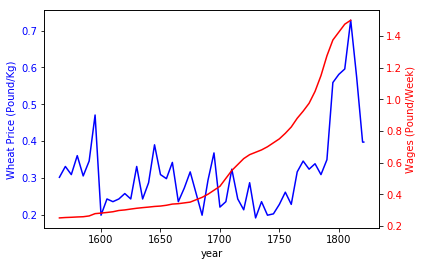

In [53]:
#plot graph with two indipendent y-axis
fig,ax1=plt.subplots()

color='blue'
ax1.set_xlabel('year')
ax1.set_ylabel('Wheat Price (Pound/Kg)',color=color)
ax1.plot(df['Year'],df['Wheat'],c=color)
ax1.tick_params(axis='y',labelcolor=color)

ax2=ax1.twinx() #share the same x-axis

color='red'
ax2.set_ylabel('Wages (Pound/Week)',color=color)
ax2.plot(df['Year'],df['Wages'],c=color)
ax2.tick_params(axis='y',labelcolor=color)


plt.show()

In [46]:
#plot purchasing power
#purchasing power define as how much wheat a work can buy with a weekly salary:
#in our dataframe is df['Wages']/df['Wheat']
#define a new column PW short for purchasing power
df['PW']=df['Wages']/df['Wheat']

In [54]:
df.tail()

Unnamed: 0  Year     Wheat  Wages        PW
48          49  1805  0.595588  1.475  2.476543
49          50  1810  0.727941  1.500  2.060606
50          51  1815  0.573529    NaN       NaN
51          52  1820  0.397059    NaN       NaN
52          53  1821  0.397059    NaN       NaN

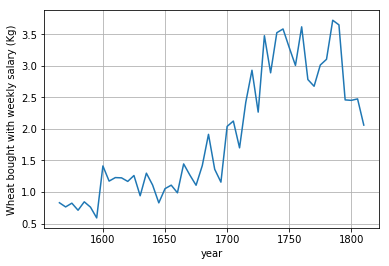

In [55]:
#pw vs year
plt.plot(df['Year'][:-3],df['PW'][:-3])
plt.xlabel('year')
plt.ylabel('Wheat bought with weekly salary (Kg)')
plt.grid()
plt.show()

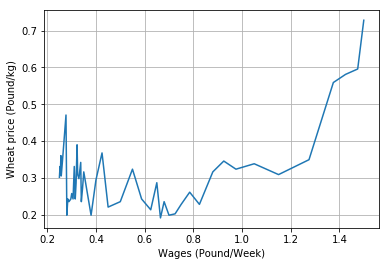

In [57]:
#wheat price vs wages
#because wages increase as years, so the advancement of time is the same as wages
plt.plot(df['Wages'][:-3],df['Wheat'][:-3])
plt.ylabel('Wheat price (Pound/kg)')
plt.xlabel('Wages (Pound/Week)')
plt.grid()
plt.show()